In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

## Bank Data

In [37]:
bank=pd.read_csv("E:\\itsstudytym\\assignments\\LR\\bank-full LR.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [38]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

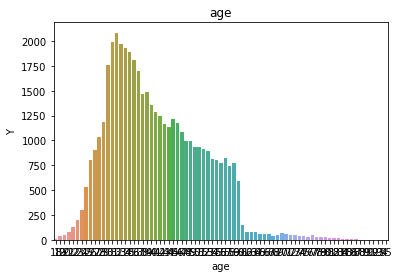

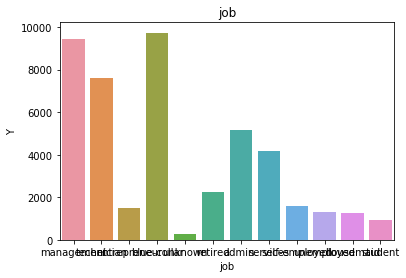

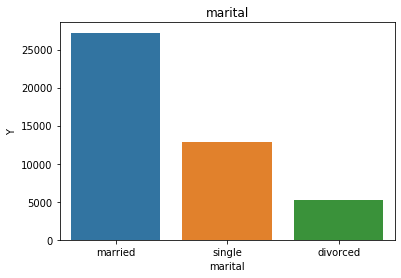

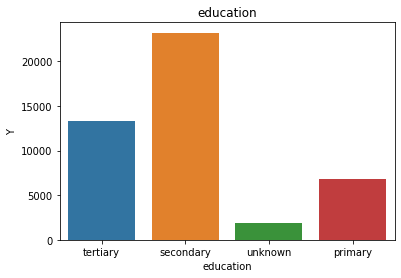

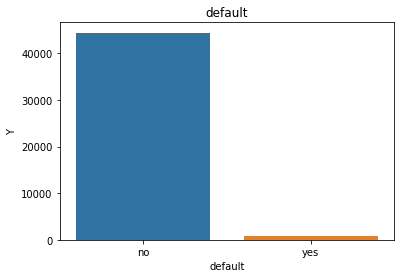

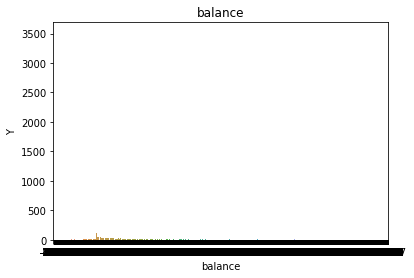

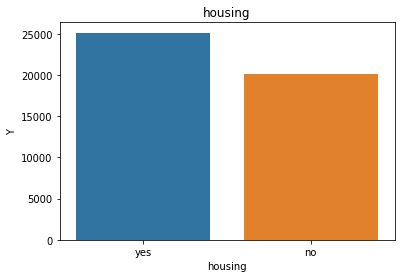

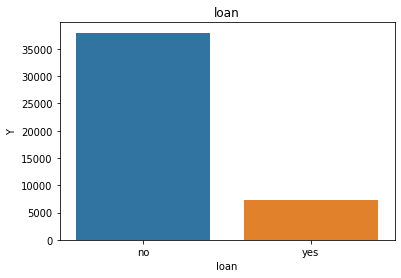

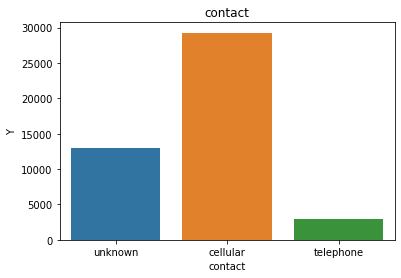

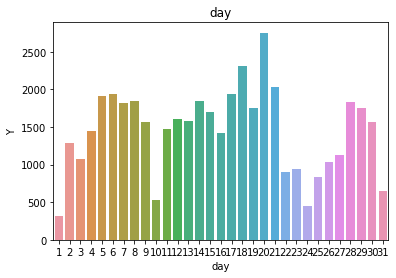

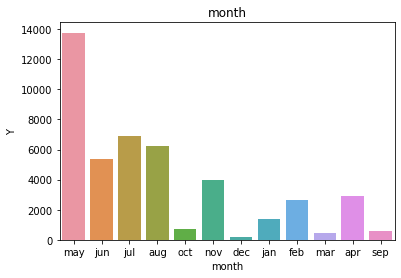

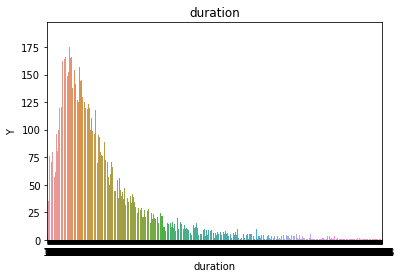

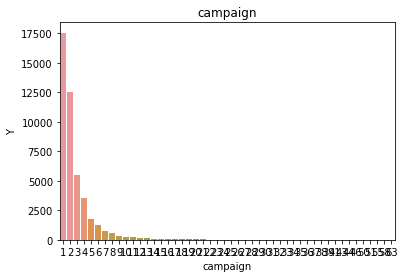

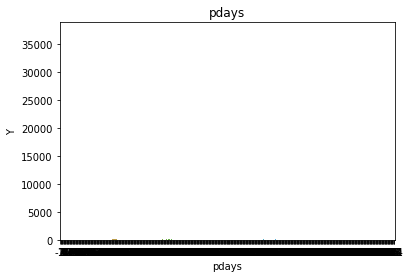

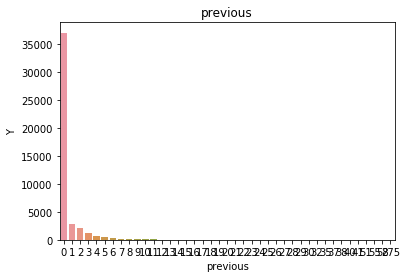

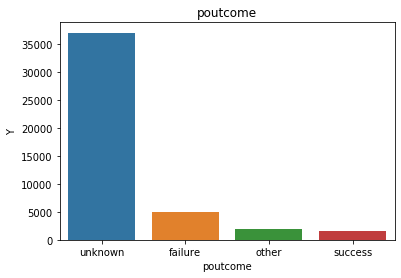

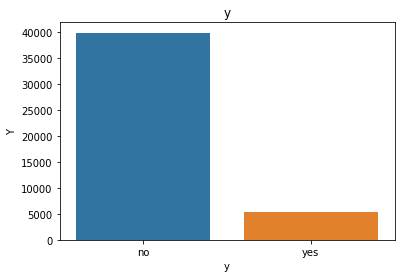

In [9]:
for feature in bank.columns:
    sbn.countplot(feature,data=bank)
    plt.xlabel(feature)
    plt.ylabel('Y')
    plt.title(feature)
    plt.show()

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
bank.iloc[:,:].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [13]:
from sklearn.model_selection import train_test_split

In [40]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
category=[feature for feature in bank.columns if bank[feature].dtypes=='O']
category

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [42]:
for feature in category:
    if feature!='y':
        bank[feature]=pd.get_dummies(bank[feature],drop_first=True)

In [43]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,0,0,2143,1,0,0,5,0,261,1,-1,0,0,no
1,44,0,0,1,0,29,1,0,0,5,0,151,1,-1,0,0,no
2,33,0,1,1,0,2,1,1,0,5,0,76,1,-1,0,0,no
3,47,1,1,0,0,1506,1,0,0,5,0,92,1,-1,0,0,no
4,33,0,0,0,0,1,0,0,0,5,0,198,1,-1,0,0,no


In [44]:
from sklearn.linear_model import LogisticRegression
LRM=LogisticRegression()

In [48]:
X=bank.iloc[:,:-1]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,0,1,0,0,2143,1,0,0,5,0,261,1,-1,0,0
1,44,0,0,1,0,29,1,0,0,5,0,151,1,-1,0,0
2,33,0,1,1,0,2,1,1,0,5,0,76,1,-1,0,0
3,47,1,1,0,0,1506,1,0,0,5,0,92,1,-1,0,0
4,33,0,0,0,0,1,0,0,0,5,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1,0,0,825,0,0,0,17,0,977,3,-1,0,0
45207,71,0,0,0,0,1729,0,0,0,17,0,456,2,-1,0,0
45208,72,0,1,1,0,5715,0,0,0,17,0,1127,5,184,3,0
45209,57,1,1,1,0,668,0,0,1,17,0,508,4,-1,0,0


In [49]:
y=bank['y']

In [50]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=False)

In [53]:
LRM.fit(X_train,y_train)

C:\Users\sonih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred=LRM.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n          no       0.98      0.90      0.94     13012\n         yes       0.19      0.55      0.28       552\n\n    accuracy                           0.89     13564\n   macro avg       0.58      0.72      0.61     13564\nweighted avg       0.95      0.89      0.91     13564\n'

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11719,   250],
       [ 1293,   302]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8862429961663226